In [26]:
# importing packages
import pandas as pd
import numpy as np
from scipy.interpolate import spline
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num


# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

df = pd.read_csv('cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [ ]:
data = df[['name_of_city','population_total']]
data.head()
name_of_city = df['name_of_city']
population_total = df['population_total']
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0, 0.2, 0, 0]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
name_of_city                      493 non-null object
state_code                        493 non-null int64
state_name                        493 non-null object
dist_code                         493 non-null int64
population_total                  493 non-null int64
population_male                   493 non-null int64
population_female                 493 non-null int64
0-6_population_total              493 non-null int64
0-6_population_male               493 non-null int64
0-6_population_female             493 non-null int64
literates_total                   493 non-null int64
literates_male                    493 non-null int64
literates_female                  493 non-null int64
sex_ratio                         493 non-null int64
child_sex_ratio                   493 non-null int64
effective_literacy_rate_total     493 non-null float64
effective_literacy_rate_male      493 non-n

In [90]:
df.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [32]:
print (df.describe(include=['O']))


       name_of_city     state_name               location
count           493            493                    493
unique          492             29                    490
top     Aurangabad   UTTAR PRADESH  22.6500518,88.3423199
freq              2             63                      2


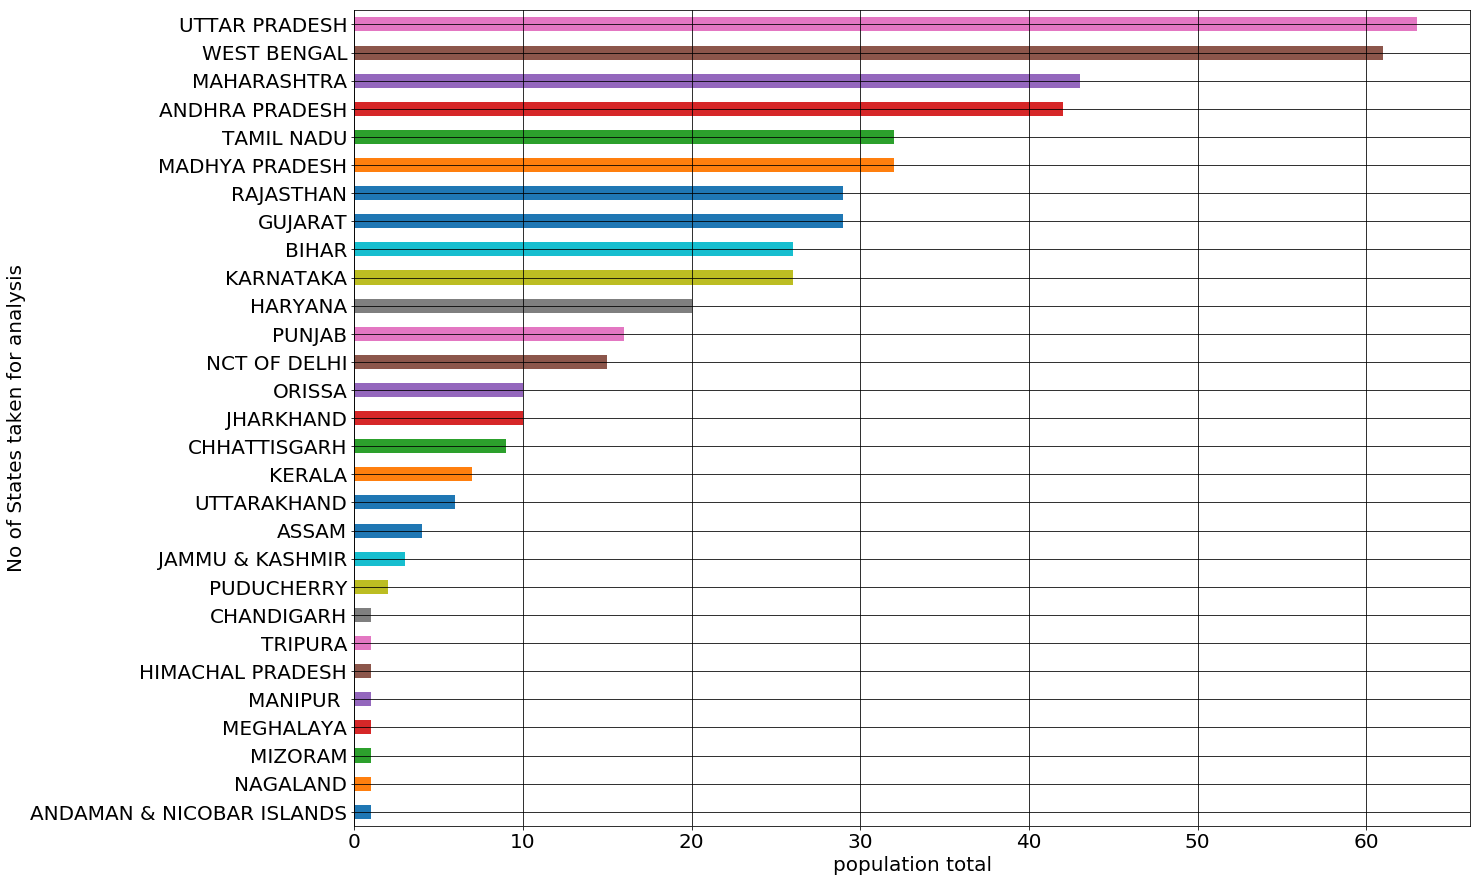

In [121]:
fig = plt.figure(figsize=(20,15))
states = df.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.ylabel('No of States taken for analysis', fontsize = 20)
plt.xlabel('population total', fontsize =20)
plt.show ()


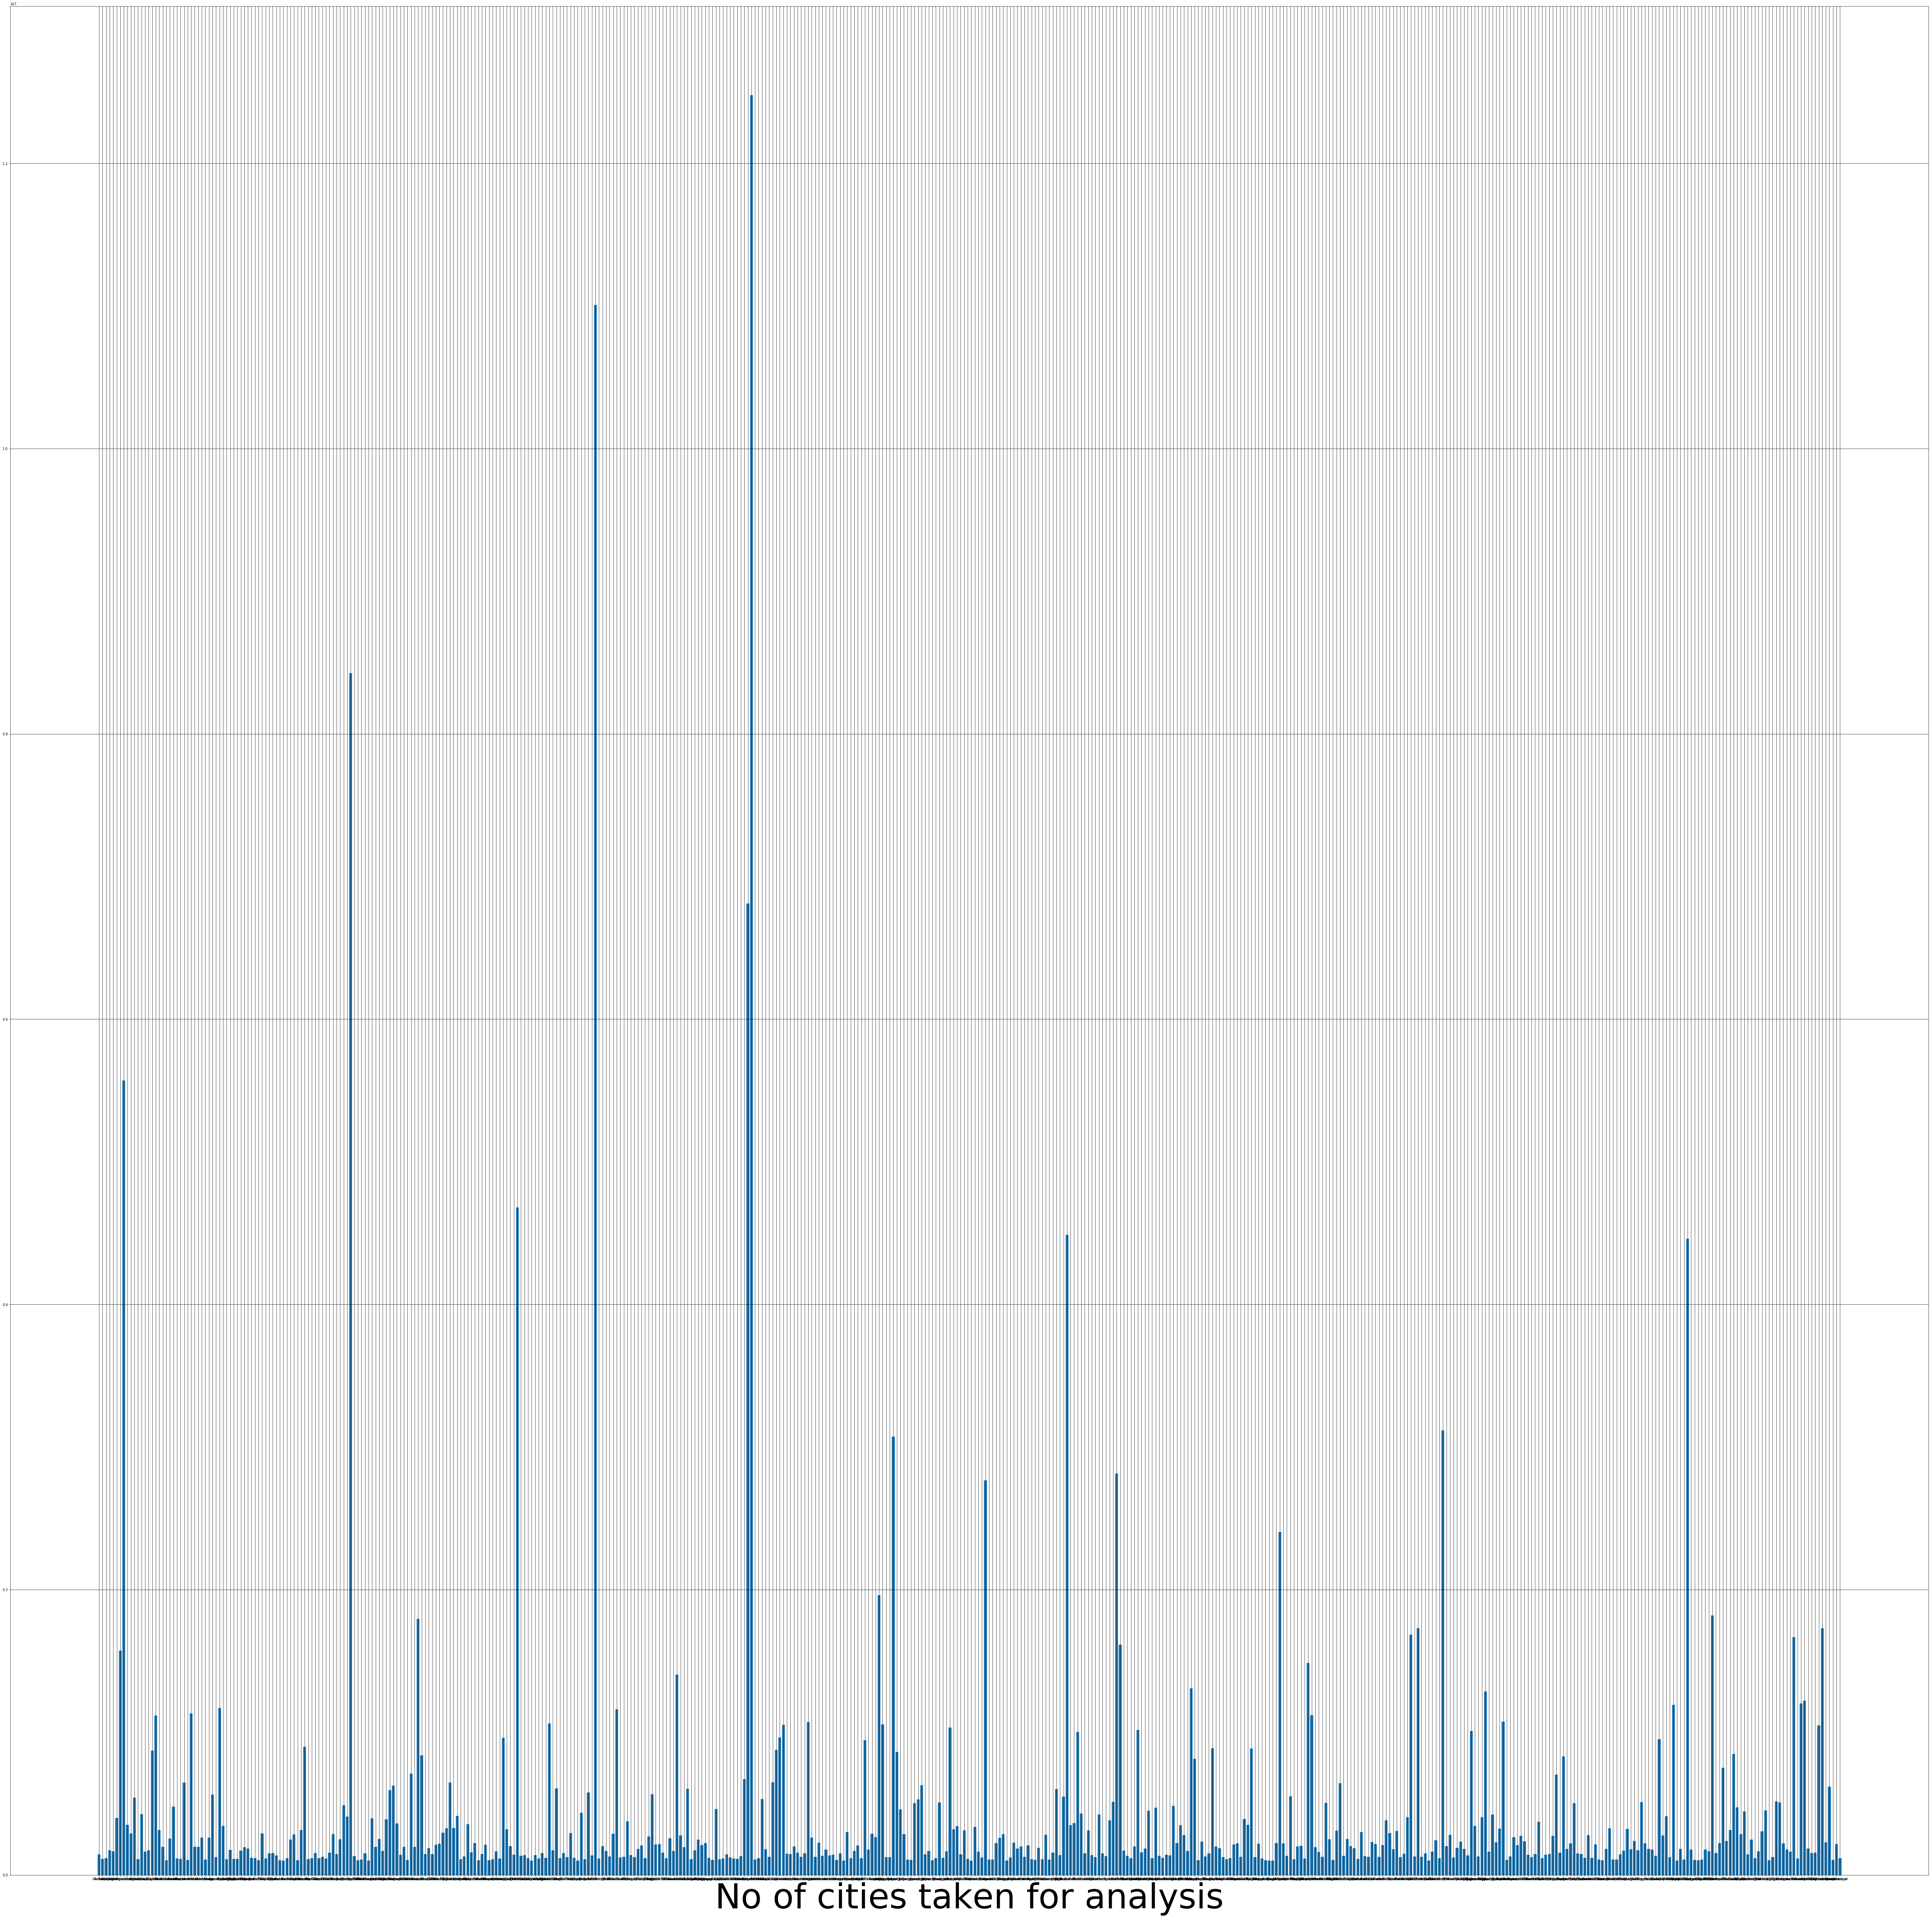

In [63]:
fig = plt.figure(figsize=(100,100))
plt.bar(name_of_city, population_total)

plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 100)

plt.show()

The Top 10 Cities sorted according to the Total Population (Descending Order)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591


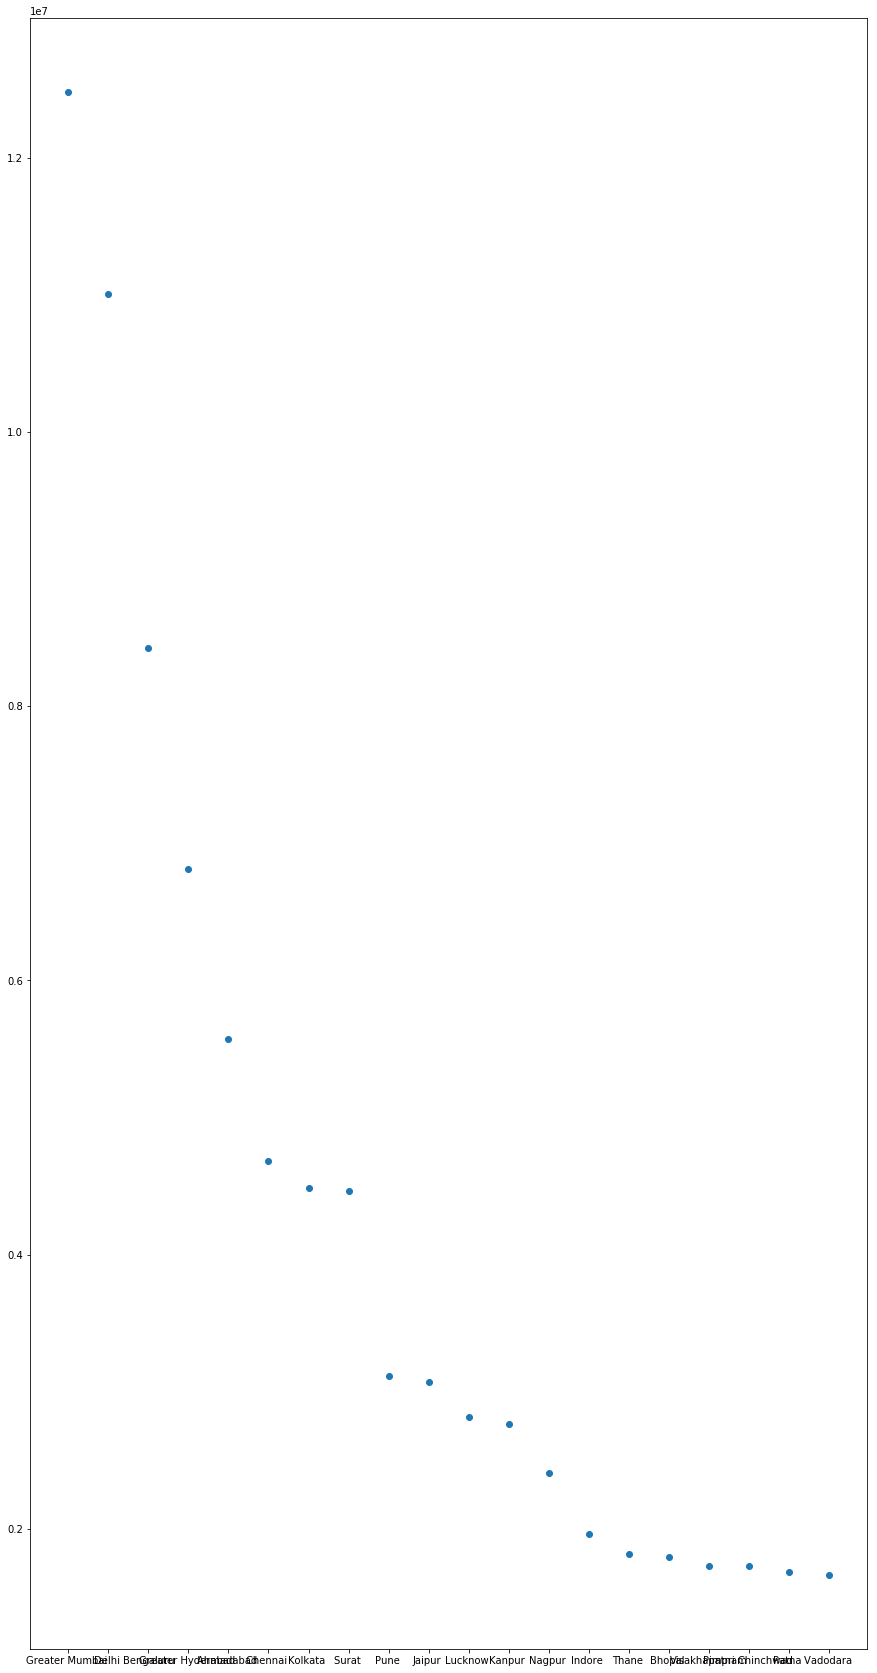

In [84]:
# A table to show top 10 cities with most population
print("The Top 10 Cities sorted according to the Total Population (Descending Order)")
top_pop_cities = df.sort_values(by='population_total',ascending=False)
df2=top_pop_cities.head(20)
city = df2['name_of_city']
pop = df2['population_total']
fig = plt.figure(figsize=(15,30))

plt.scatter(city,pop)



plt.show
df2.head()

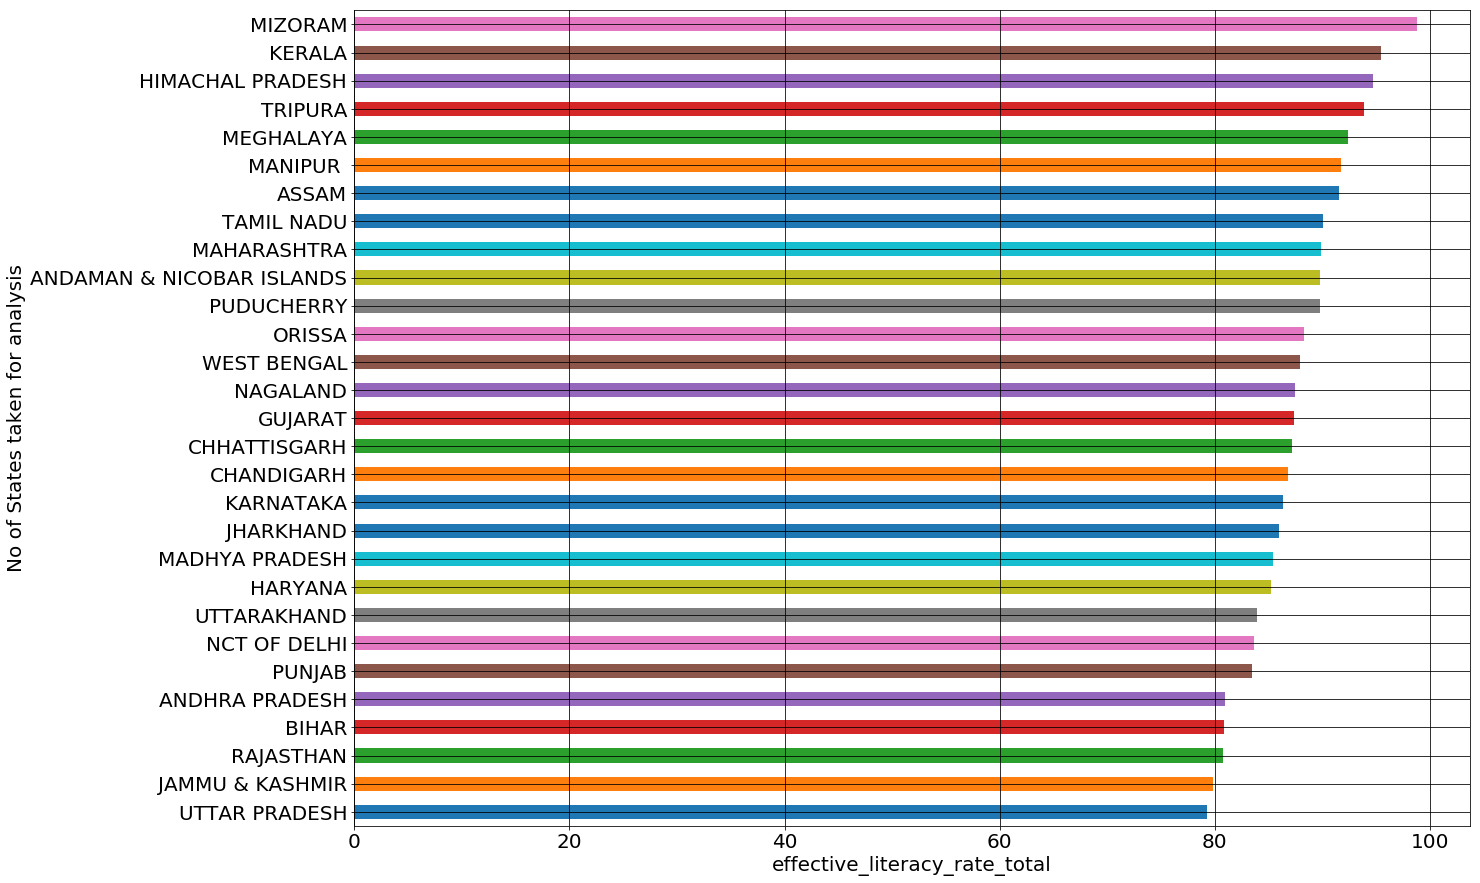

In [119]:
#effective_literacy_rate_total

fig = plt.figure(figsize=(20,15))
litr = df.groupby('state_name')['effective_literacy_rate_total'].mean().sort_values(ascending=True)
litr.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.ylabel('No of States taken for analysis', fontsize = 20)
plt.xlabel('effective_literacy_rate_total', fontsize =20)
plt.show ()

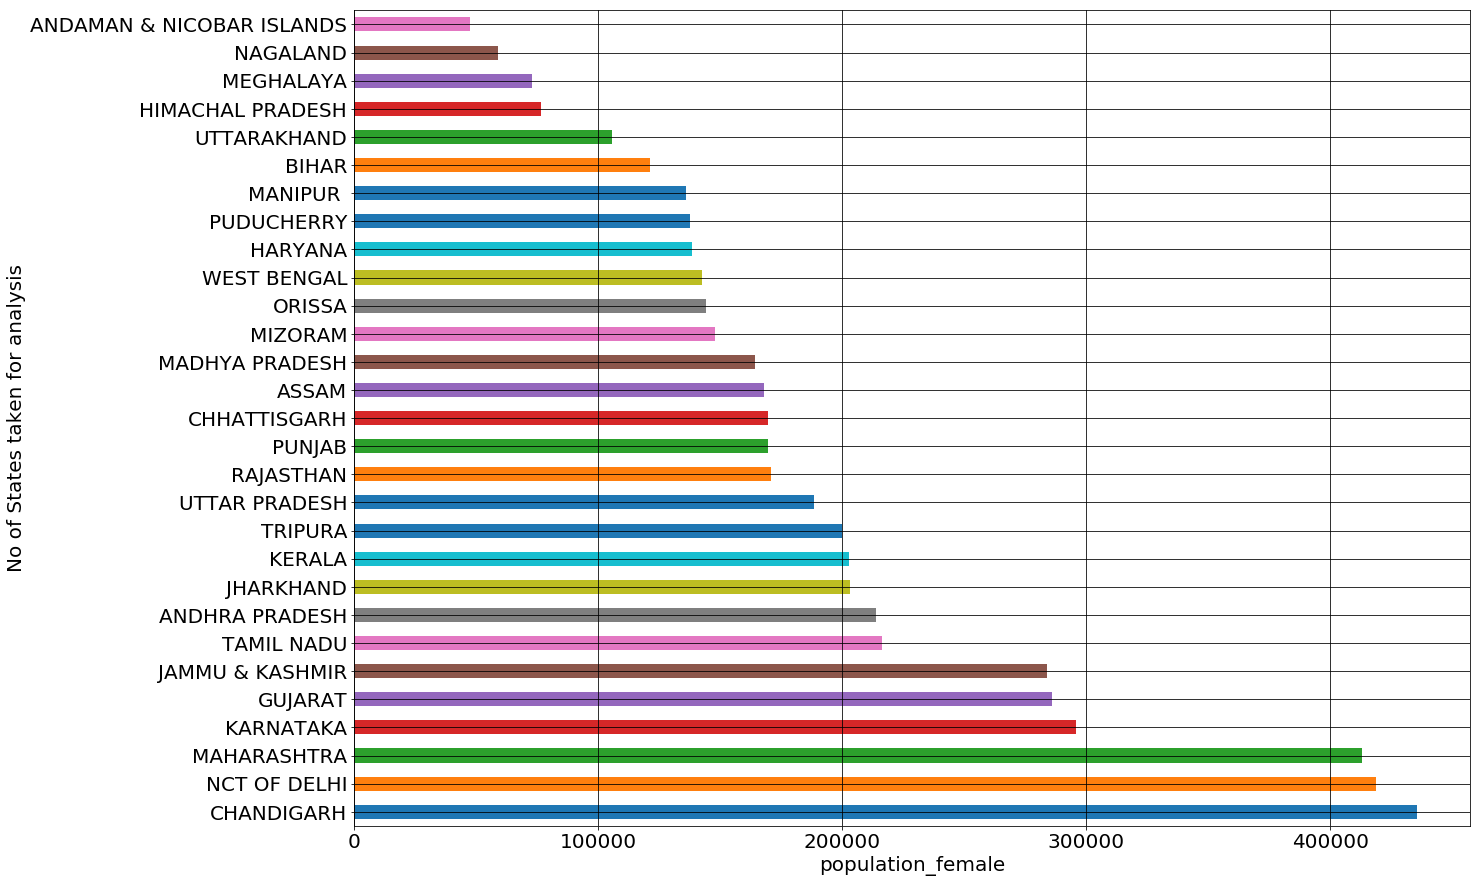

In [105]:
fig = plt.figure(figsize=(20,15))
litr1 = df.groupby('state_name')['population_female'].mean().sort_values(ascending=False)
litr1.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.ylabel('No of States taken for analysis', fontsize = 20)
plt.xlabel('population_female', fontsize =20)
plt.show ()

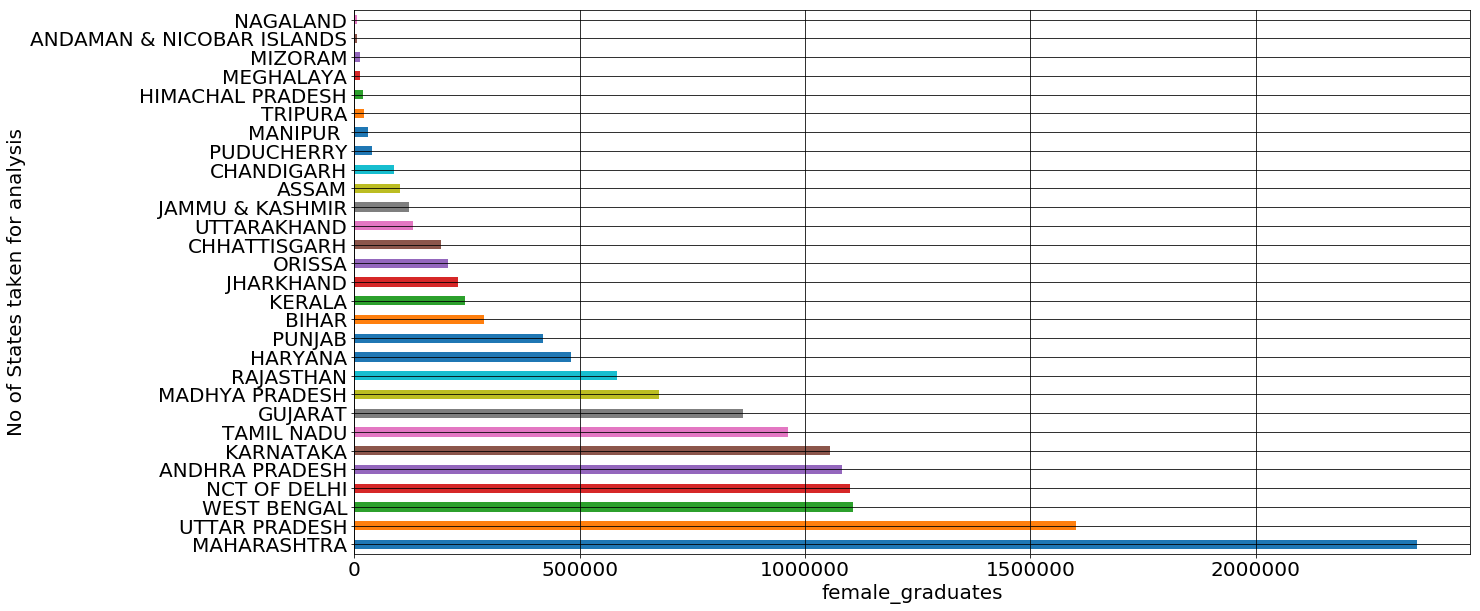

In [116]:
fig = plt.figure(figsize=(20,10))
litr1 = df.groupby('state_name')['female_graduates'].sum().sort_values(ascending=False)
litr1.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.ylabel('No of States taken for analysis', fontsize = 20)
plt.xlabel('female_graduates', fontsize =20)
plt.show ()

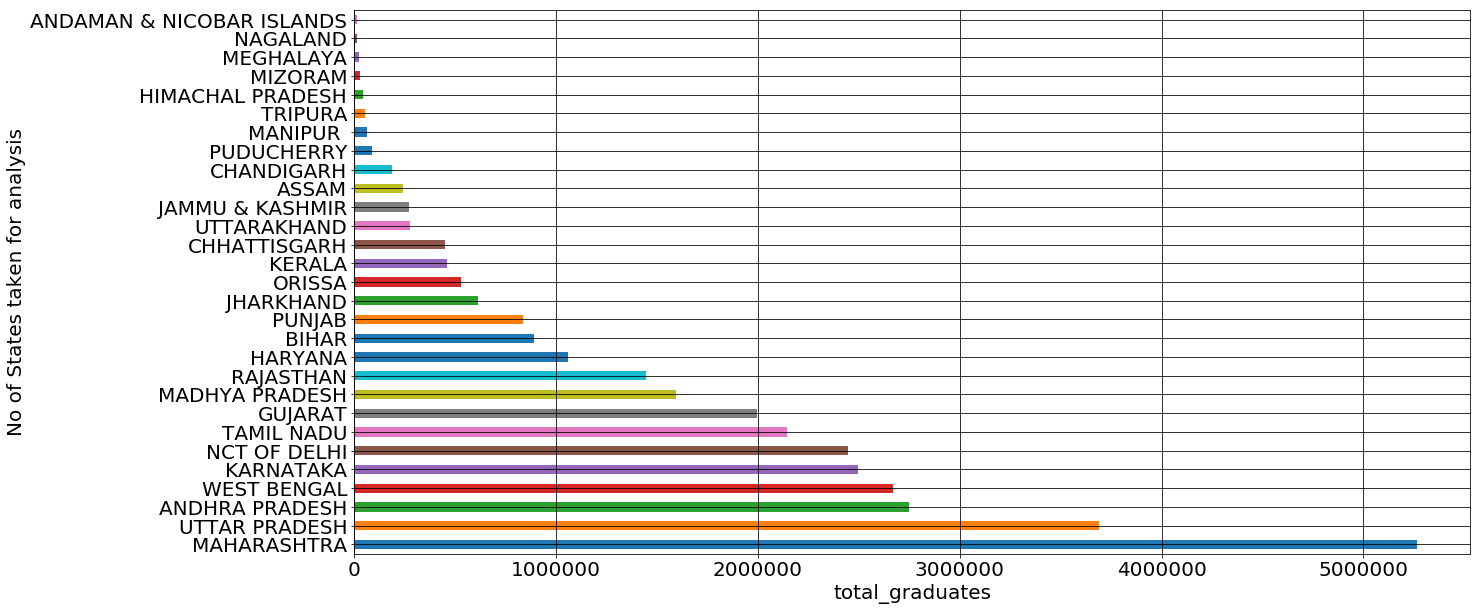

state_name
MAHARASHTRA       5266151
UTTAR PRADESH     3692166
ANDHRA PRADESH    2751351
WEST BENGAL       2668776
KARNATAKA         2495820
Name: total_graduates, dtype: int64

In [117]:
fig = plt.figure(figsize=(20,10))
litr2 = df.groupby('state_name')['total_graduates'].sum().sort_values(ascending=False)
litr2.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.ylabel('No of States taken for analysis', fontsize = 20)
plt.xlabel('total_graduates', fontsize =20)
plt.show ()
litr2.head()